### Objective: To build an unbiased machine learning model that can be deployed in the cloud for effective prediction of a staff’s promotion based on his historical data which include educational and job related data

#### Import useful libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
import warnings
sns.set_theme(style="ticks", color_codes=True)
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore warnings from sklearn and seaborn

#### Load train and test data from CSv Files (train.csv & test.csv)

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
train_cat = df_train
test_cat = df_test

#### Preview of the dataset

In [4]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


#### Descriptive statistics for the numerical features

In [5]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


#### Descriptive statistics for the categorical features

In [6]:
df_train.describe(include=[np.object, pd.Categorical])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


#### check the shape of the dataset (count of rows and columns)

In [7]:
print(df_train.shape)
print(df_test.shape)

(54808, 13)
(23490, 12)


#### Inspect the data types and other information of the various columns present in the dataset

In [8]:
df_train.info()
#From the information given above, we observed that the columns (education & previous_year_rating) are having missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


#### Check and remove duplicate rows/records from the dataset

In [9]:
print('Shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates(subset='employee_id', keep='last')
print('Shape after removing duplicate rows:', df_train.shape)
#We do not have duplicate rows/records

Shape before removing duplicate rows: (54808, 13)
Shape after removing duplicate rows: (54808, 13)


#### Count the missing values in each columns of the dataset

In [10]:
df_train.isnull().sum() #we have 2409 and 4124 missing values in the education and previous_year_rating columns respectively

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Percentage of missing values by columns/features

,Total,Percent
previous_year_rating,4124,0.075244
education,2409,0.043953
is_promoted,0,0.000000
avg_training_score,0,0.000000
awards_won?,0,0.000000


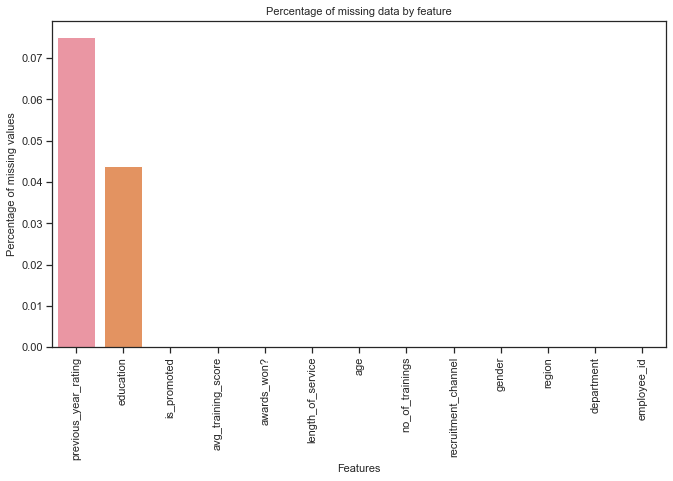

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=11)
plt.ylabel('Percentage of missing values', fontsize=11)
plt.title('Percentage of missing data by feature', fontsize=11)
missing_data.head()

#### Fill the missing values with the mode, since the affected columns are categorical

In [12]:
cols_with_missing_values = ['previous_year_rating','education']
for col in cols_with_missing_values:    
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)

#### Confirm mising values have been replaced by the mode of the affected columns/features

In [13]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Create the features 'year_of_experience' and 'overall_performance' using the existing features/columns

In [14]:
df_train['year_of_experience'] = date.today().year - df_train['length_of_service']
df_test['year_of_experience'] = date.today().year - df_test['length_of_service']
df_train['overall_performance'] = df_train['no_of_trainings'] * df_train['avg_training_score']
df_test['overall_performance'] = df_test['no_of_trainings'] * df_test['avg_training_score']

In [15]:
df_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,year_of_experience,overall_performance
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,2014,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,2018,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,2015,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,2012,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,2020,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0,2005,78
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0,2016,56
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0,2019,79
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0,2020,45


### Data Visualization

#### Histograms showing the numerical features/columns

In [16]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'year_of_experience', 'overall_performance'],
      dtype='object')

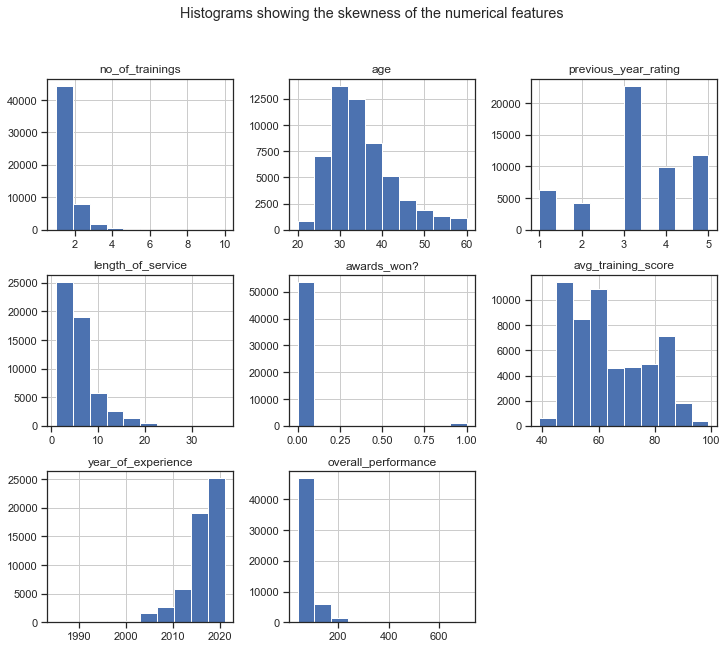

Skewness of the numerical features


no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.260858
length_of_service       1.738061
awards_won?             6.338914
avg_training_score      0.451908
year_of_experience     -1.738061
overall_performance     3.069118
dtype: float64

In [17]:
num_cols = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'year_of_experience', 'overall_performance']

df_train[num_cols].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
df_train[num_cols].skew() ## we can see that no_of_trainings, awards_won and overall_performance

#### Education background of staff

Text(0.5, 1.0, 'Educational Qualification of Staff')

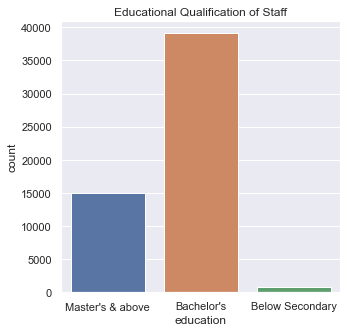

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x= 'education', data = df_train)
plt.title('Educational Qualification of Staff')

Text(0.5, 1.0, 'Recruitment Channel of Staff')

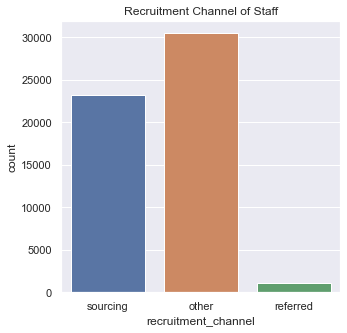

In [19]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x= 'recruitment_channel', data = df_train)
plt.title('Recruitment Channel of Staff')

Text(0.5, 1.0, 'Department of Staff')

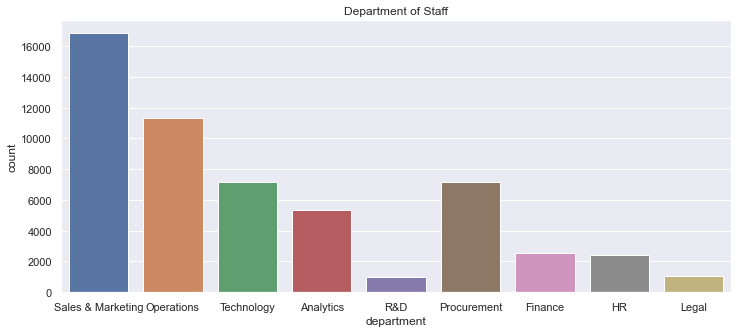

In [20]:
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(x= 'department', data = df_train)
plt.title('Department of Staff')

#### Group by department and find the department having the highest number of promotion

In [21]:
df_train.groupby('department')['is_promoted'].mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

#### Group by region and find the region having the highest number of promotion

In [22]:
df_train.groupby('region')['is_promoted'].mean().sort_values()

region
region_9     0.019048
region_34    0.027397
region_18    0.032258
region_24    0.035433
region_33    0.037175
region_32    0.042328
region_29    0.043260
region_21    0.043796
region_5     0.045692
region_6     0.046377
region_11    0.056274
region_31    0.056848
region_20    0.057647
region_19    0.060641
region_26    0.063274
region_12    0.066000
region_16    0.069625
region_14    0.074970
region_10    0.078704
region_27    0.078963
region_15    0.079060
region_2     0.080126
region_8     0.080916
region_13    0.086858
region_30    0.089802
region_1     0.095082
region_7     0.106546
region_3     0.106936
region_22    0.114188
region_23    0.116596
region_28    0.116844
region_25    0.125763
region_17    0.136935
region_4     0.144451
Name: is_promoted, dtype: float64

#### Promotion based on gender

Text(0.5, 1.0, 'Staff Promotion based on gender')

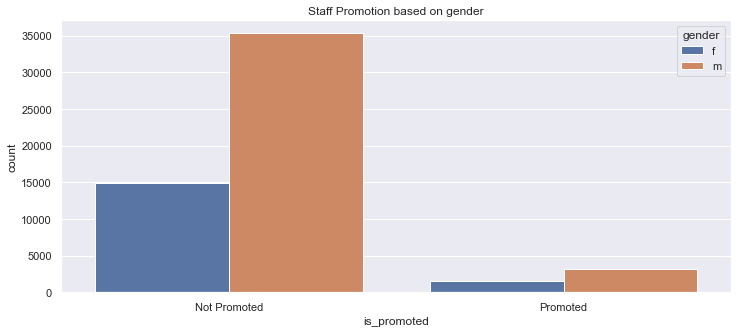

In [23]:
promoted_or_not = {1:'Promoted', 0:'Not Promoted'}
df_train['is_promoted']=df_train['is_promoted'].replace(promoted_or_not)
sns.countplot(x='is_promoted', hue='gender', data=df_train)
plt.title('Staff Promotion based on gender')

#### Staff Promotion Based on Educational Qualification

Text(0.5, 1.0, 'Staff Promotion based on education')

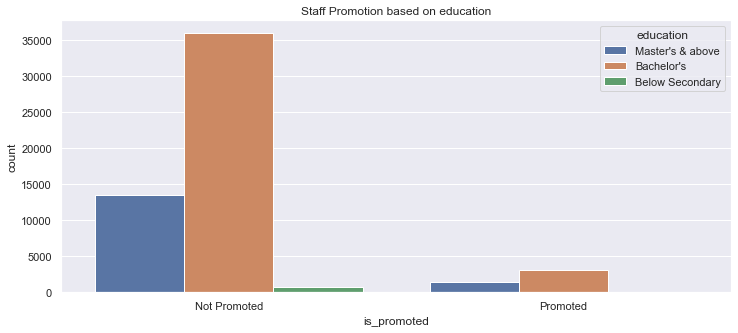

In [24]:
sns.countplot(x='is_promoted', hue='education', data=df_train)
plt.title('Staff Promotion based on education')

#### Heat map showing the correlation between two features

Text(0.5, 1.0, 'Correlation Plot of the numerical features')

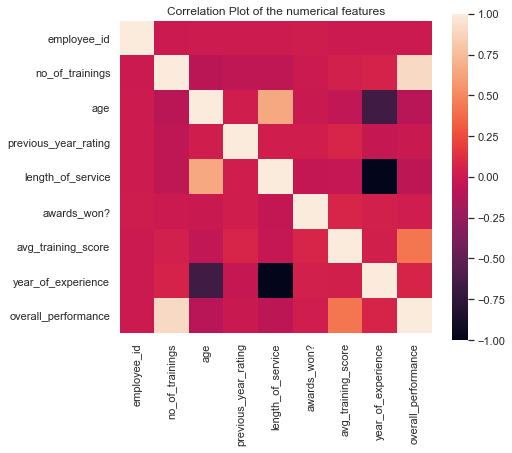

In [25]:
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(7,6))
sns.heatmap(corrmat, square=True)
plt.title('Correlation Plot of the numerical features')

#### Correlation between the features and the target variables

In [26]:
df_train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,year_of_experience,overall_performance
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,0.008420,-0.000586,-0.001274,-0.004675
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.007628,0.042517,0.057275,0.901878
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.008169,-0.048380,-0.657111,-0.090798
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.026587,0.071926,-0.023504,-0.012217
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.039927,-0.038122,-1.000000,-0.066417
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,1.000000,0.072138,0.039927,0.018706
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.072138,1.000000,0.038122,0.427185
year_of_experience,-0.001274,0.057275,-0.657111,-0.023504,-1.000000,0.039927,0.038122,1.000000,0.066417
overall_performance,-0.004675,0.901878,-0.090798,-0.012217,-0.066417,0.018706,0.427185,0.066417,1.000000


#### Check for the categories i.e. unique values in each column

In [27]:
cat_col = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique department 9
Number of unique region 34
Number of unique education 3
Number of unique gender 2
Number of unique recruitment_channel 3
Number of unique no_of_trainings 10
Number of unique age 41
Number of unique previous_year_rating 5
Number of unique length_of_service 35
Number of unique awards_won? 2


In [28]:
unique_cat_col = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?']
for cat in unique_cat_col:
    print(df_train[cat].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']
[ 1  2  3  4  7  5  6  8 10  9]
[35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
[5. 3. 1. 4. 2.]
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
[0 1]


#### Regroup feature 'education'

In [29]:
education = {"Master's & above" :">=masters_deg", "Bachelor's":"bachelors_deg",
             "Below Secondary":"below_secondary"}
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['education'] = dataset['education'].replace(education)

In [30]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,year_of_experience,overall_performance
0,65438,Sales & Marketing,region_7,>=masters_deg,f,sourcing,1,35,5.0,8,0,49,Not Promoted,2014,49
1,65141,Operations,region_22,bachelors_deg,m,other,1,30,5.0,4,0,60,Not Promoted,2018,60
2,7513,Sales & Marketing,region_19,bachelors_deg,m,sourcing,1,34,3.0,7,0,50,Not Promoted,2015,50
3,2542,Sales & Marketing,region_23,bachelors_deg,m,other,2,39,1.0,10,0,50,Not Promoted,2012,100
4,48945,Technology,region_26,bachelors_deg,m,other,1,45,3.0,2,0,73,Not Promoted,2020,73


#### Distribution of the target variables

Not Promoted    0.91483
Promoted        0.08517
Name: is_promoted, dtype: float64


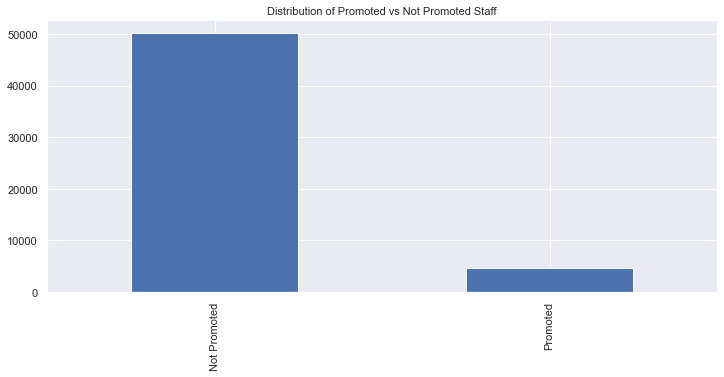

In [31]:
promoted_or_not = {1:'Promoted', 0:'Not Promoted'}
df_train['is_promoted']=df_train['is_promoted'].replace(promoted_or_not)
print(df_train['is_promoted'].value_counts(normalize=True))
df_train['is_promoted'].value_counts().plot(kind='bar')
plt.title('Distribution of Promoted vs Not Promoted Staff', fontsize=11)
plt.show() 

#### Distribution of Awards received by staff

Didnt receive award    0.976828
Received Award         0.023172
Name: awards_won?, dtype: float64


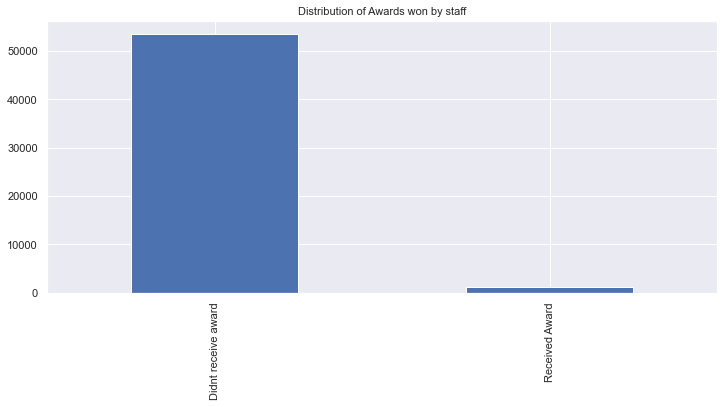

In [32]:
awarded_or_not = {1:'Received Award', 0:'Didnt receive award'}
df_train['awards_won?']=df_train['awards_won?'].replace(awarded_or_not)
print(df_train['awards_won?'].value_counts(normalize=True))
df_train['awards_won?'].value_counts().plot(kind='bar')
plt.title('Distribution of Awards won by staff', fontsize=11)
plt.show() 

#### Percentage contribution based on the number of trainings received by staff

In [33]:
print(df_train['no_of_trainings'].value_counts(normalize=True))

1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
10    0.000091
9     0.000091
8     0.000091
Name: no_of_trainings, dtype: float64


#### Previous year training received by staff

3.0    0.414939
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
Name: previous_year_rating, dtype: float64


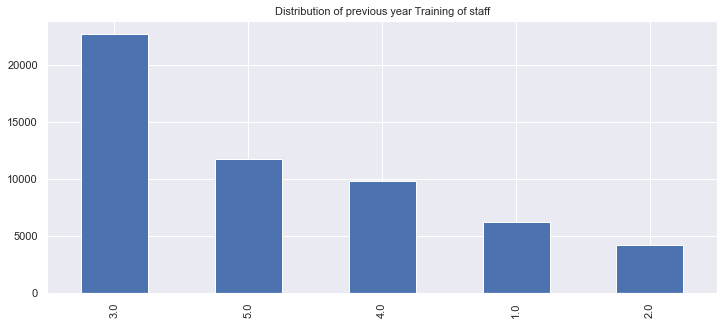

In [34]:
print(df_train['previous_year_rating'].value_counts(normalize=True))
df_train['previous_year_rating'].value_counts().plot(kind='bar')
plt.title('Distribution of previous year Training of staff', fontsize=11)
plt.show() 

#### Convert target and awards_won variables back to integers

In [35]:
promoted_or_not = {'Promoted':1,'Not Promoted':0}
awards_won = {'Received Award':1,'Didnt receive award':0}
df_train['is_promoted']=df_train['is_promoted'].replace(promoted_or_not)
df_train['awards_won?']=df_train['awards_won?'].replace(awards_won)

#### Relationship between the numeric feature (age) and the categorical features


In [36]:
categ_cols = ['department', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'awards_won?']

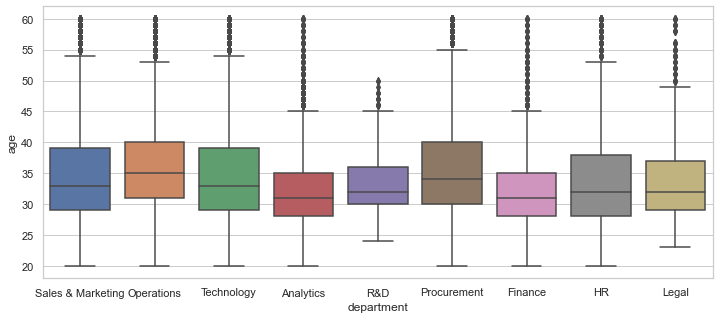

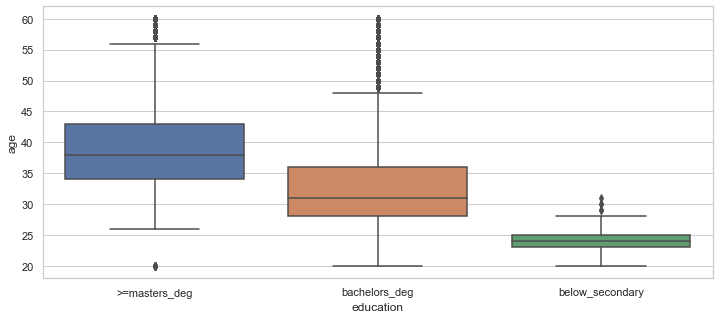

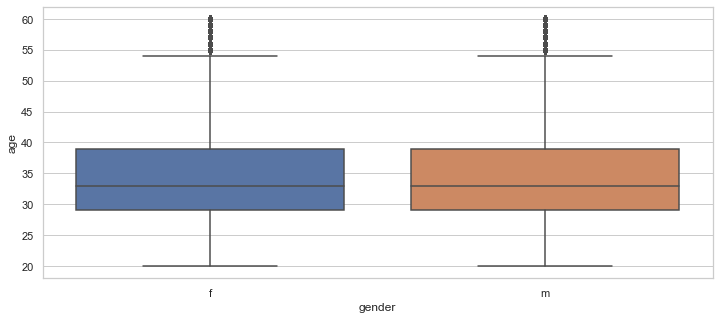

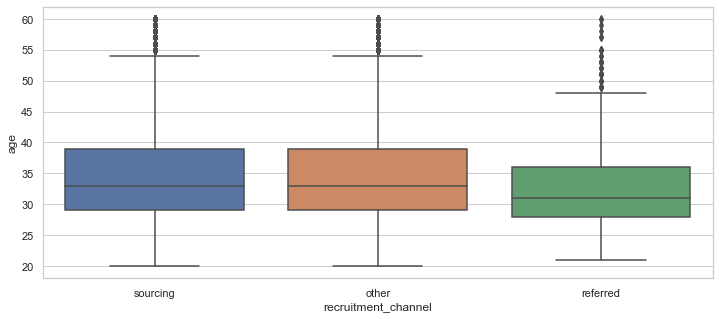

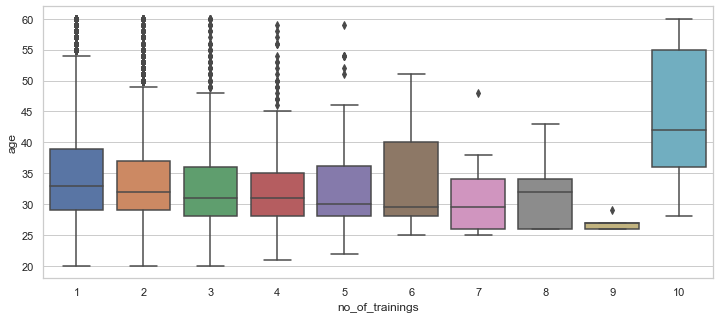

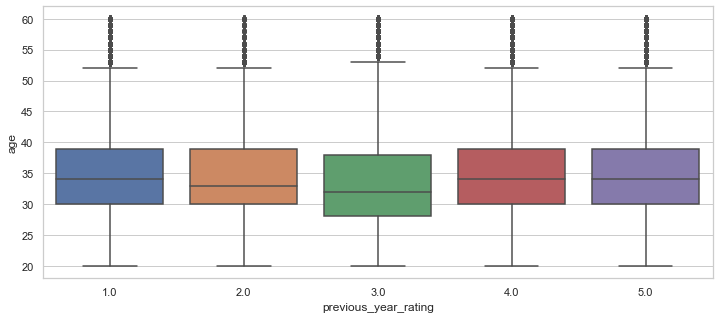

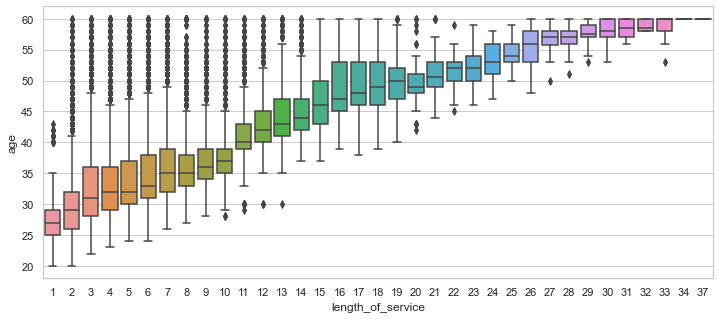

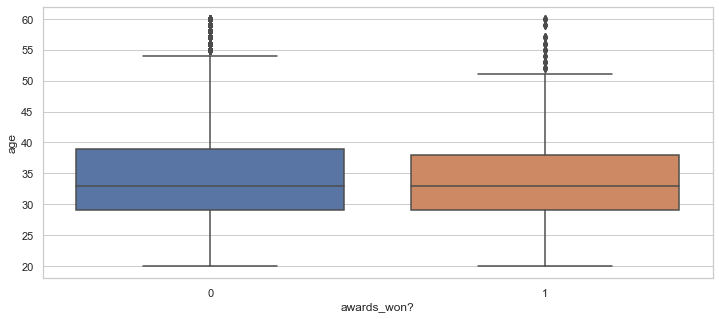

In [37]:
def plot_box(df_train, cols, col_y = 'age'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
plot_box(df_train, categ_cols)

In [38]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
       'year_of_experience', 'overall_performance'],
      dtype='object')

#### Encode the columns 'region','length_of_service', 'overall_performance','year_of_experience', & 'avg_training_score' in the dataset

In [39]:
def find_category_mean(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode_mean(train, test, variable, ordinal_mapping):

    df_train[variable] = df_train[variable].map(ordinal_mapping)
    df_test[variable] = df_test[variable].map(ordinal_mapping)

In [40]:
for variable in ['region','length_of_service','avg_training_score','overall_performance','year_of_experience']:
    mappings = find_category_mean(df_train, variable, 'is_promoted')
    integer_encode_mean(df_train, df_test, variable, mappings)

#### Features selected from the train and test dataset

In [41]:
train_cols = ['department', 'region', 'education', 'gender',
               'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
               'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted',
               'year_of_experience', 'overall_performance']
test_cols = ['department', 'region', 'education', 'gender',
               'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
               'length_of_service', 'awards_won?', 'avg_training_score',
               'year_of_experience', 'overall_performance']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

#### Dummify the categorical features

In [42]:
cols = ['department','education', 'gender','recruitment_channel', 
        'no_of_trainings', 'previous_year_rating','awards_won?']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__', drop_first=True)
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__', drop_first=True) 

In [43]:
train.head()

,region,age,length_of_service,avg_training_score,is_promoted,year_of_experience,overall_performance,department__Finance,department__HR,department__Legal,...,no_of_trainings__6,no_of_trainings__7,no_of_trainings__8,no_of_trainings__9,no_of_trainings__10,previous_year_rating__2.0,previous_year_rating__3.0,previous_year_rating__4.0,previous_year_rating__5.0,awards_won?__1
0,0.106546,35,0.093306,0.037300,0,0.093306,0.041761,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.114188,30,0.087478,0.064037,0,0.087478,0.063164,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.060641,34,0.083589,0.041237,0,0.083589,0.044465,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.116596,39,0.093023,0.041237,0,0.093023,0.028871,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.063274,45,0.089019,0.112811,0,0.089019,0.111639,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Relationship between the target variable and the features

In [44]:
train.corr()['is_promoted'].sort_values()

previous_year_rating__2.0       -0.043827
previous_year_rating__3.0       -0.032229
department__Sales & Marketing   -0.031348
education__bachelors_deg        -0.028650
department__HR                  -0.022262
age                             -0.017166
department__Legal               -0.017011
no_of_trainings__2              -0.013941
gender__m                       -0.011109
no_of_trainings__3              -0.010802
no_of_trainings__5              -0.010700
no_of_trainings__4              -0.009846
previous_year_rating__4.0       -0.009732
department__R&D                 -0.007859
no_of_trainings__7              -0.004515
no_of_trainings__6              -0.004033
department__Finance             -0.003109
no_of_trainings__8              -0.002914
no_of_trainings__9              -0.002914
no_of_trainings__10             -0.002914
education__below_secondary      -0.000849
recruitment_channel__sourcing   -0.000483
department__Operations           0.009113
department__Procurement          0

#### Features selected for training the machine learning algorithms

In [45]:
features = ['region', 'age', 'length_of_service', 'avg_training_score',
       'year_of_experience', 'overall_performance',
       'department__Finance', 'department__HR', 'department__Legal',
       'department__Operations', 'department__Procurement', 'department__R&D',
       'department__Sales & Marketing', 'department__Technology',
       'education__bachelors_deg', 'education__below_secondary', 'gender__m',
       'recruitment_channel__referred', 'recruitment_channel__sourcing',
       'no_of_trainings__2', 'no_of_trainings__3', 'no_of_trainings__4',
       'no_of_trainings__5', 'no_of_trainings__6', 'no_of_trainings__7',
       'no_of_trainings__8', 'no_of_trainings__9',
       'previous_year_rating__2.0', 'previous_year_rating__3.0',
       'previous_year_rating__4.0', 'previous_year_rating__5.0',
       'awards_won?__1']

In [46]:
predicted_class_name = ['is_promoted']
X = train[features].values
y = train[predicted_class_name].values

### Predictive Analytics Using Machine Learing

#### Import necessary machine learning libraries

In [47]:
#!pip3 install catboost
#!pip3 install xgboost

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import Pool, CatBoostClassifier, cv
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

#### split the data into train and test set

In [49]:
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

#### Percentage of Train and Test data

In [50]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


#### Features selected for testing the performance of the machine learning algorithms

In [51]:
colu =  ['region', 'age', 'length_of_service', 'avg_training_score',
       'year_of_experience', 'overall_performance',
       'department__Finance', 'department__HR', 'department__Legal',
       'department__Operations', 'department__Procurement', 'department__R&D',
       'department__Sales & Marketing', 'department__Technology',
       'education__bachelors_deg', 'education__below_secondary', 'gender__m',
       'recruitment_channel__referred', 'recruitment_channel__sourcing',
       'no_of_trainings__2', 'no_of_trainings__3', 'no_of_trainings__4',
       'no_of_trainings__5', 'no_of_trainings__6', 'no_of_trainings__7',
       'no_of_trainings__8', 'no_of_trainings__9',
       'previous_year_rating__2.0', 'previous_year_rating__3.0',
       'previous_year_rating__4.0', 'previous_year_rating__5.0',
       'awards_won?__1']
test1=test[colu]

In [52]:
print(X_train.shape)
print(test1.shape)

(38365, 32)
(23490, 32)


#### Standardize the dataset i.e. resize the distribution of values to mean 0 and standard deviation 1 

In [53]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [54]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

#### Using the Logistic regression for the prediction

In [55]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [56]:
probabilities = reg.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     15062                48
Actual negative      1122               211

Accuracy        0.93
AUC             0.77
Macro precision 0.87
Macro recall    0.58
 
           Positive      Negative
Num case    15110          1333
Precision    0.93          0.81
Recall       1.00          0.16
F1           0.96          0.27


#### Using the RandomForest algorithm for prediction

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
probabilities = rf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     15032                78
Actual negative       992               341

Accuracy        0.93
AUC             0.77
Macro precision 0.88
Macro recall    0.63
 
           Positive      Negative
Num case    15110          1333
Precision    0.94          0.81
Recall       0.99          0.26
F1           0.97          0.39


#### Using the GradientBoost algorithm for prediction

In [59]:
gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
probabilities = gboost.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     15082                28
Actual negative       982               351

Accuracy        0.94
AUC             0.80
Macro precision 0.93
Macro recall    0.63
 
           Positive      Negative
Num case    15110          1333
Precision    0.94          0.93
Recall       1.00          0.26
F1           0.97          0.41


#### Using the decisiontree algorithm for prediction

In [61]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
probabilities = dTree.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     13936              1174
Actual negative       845               488

Accuracy        0.88
AUC             0.64
Macro precision 0.62
Macro recall    0.64
 
           Positive      Negative
Num case    15110          1333
Precision    0.94          0.29
Recall       0.92          0.37
F1           0.93          0.33


#### Using the AdaBoost algorithm for prediction

In [63]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier()

In [64]:
probabilities = adb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     15070                40
Actual negative      1098               235

Accuracy        0.93
AUC             0.78
Macro precision 0.89
Macro recall    0.59
 
           Positive      Negative
Num case    15110          1333
Precision    0.93          0.85
Recall       1.00          0.18
F1           0.96          0.29


#### Using the KNNclassifier algorithm for prediction

In [65]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
probabilities = knn.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     14992               118
Actual negative      1097               236

Accuracy        0.93
AUC             0.68
Macro precision 0.80
Macro recall    0.58
 
           Positive      Negative
Num case    15110          1333
Precision    0.93          0.67
Recall       0.99          0.18
F1           0.96          0.28


#### Using the XGBoost Algorithm for prediction

In [67]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [68]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     15058                52
Actual negative       885               448

Accuracy        0.94
AUC             0.81
Macro precision 0.92
Macro recall    0.67
 
           Positive      Negative
Num case    15110          1333
Precision    0.94          0.90
Recall       1.00          0.34
F1           0.97          0.49


### Using the catboost algorithm for prediction

#### Fill missing values with outliers

In [69]:
train_cat.fillna(-999,inplace=True)
test_cat.fillna(-999,inplace=True)

In [70]:
x = train_cat.drop('is_promoted',axis=1)
y = train_cat.is_promoted

#### Check the shape of the dataset

In [71]:
print(x.shape)
print(y.shape)

(54808, 14)
(54808,)


In [72]:
cate_features_index = np.where(x.dtypes != float)[0];cate_features_index

array([ 0,  1,  3,  4,  5,  6,  7, 10], dtype=int64)

#### split data to train and test

In [73]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

#### Run the catboost algorithm

In [74]:
model = CatBoostClassifier(iterations=5000, depth=8, learning_rate=0.01,eval_metric='Accuracy',use_best_model=True, random_seed=42)
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

0:	learn: 0.9225304	test: 0.9210654	best: 0.9210654 (0)	total: 222ms	remaining: 18m 31s
1:	learn: 0.9231099	test: 0.9224033	best: 0.9224033 (1)	total: 364ms	remaining: 15m 8s
2:	learn: 0.9256429	test: 0.9237412	best: 0.9237412 (2)	total: 521ms	remaining: 14m 27s
3:	learn: 0.9249345	test: 0.9228898	best: 0.9237412 (2)	total: 685ms	remaining: 14m 14s
4:	learn: 0.9249775	test: 0.9231331	best: 0.9237412 (2)	total: 742ms	remaining: 12m 20s
5:	learn: 0.9246125	test: 0.9227682	best: 0.9237412 (2)	total: 839ms	remaining: 11m 37s
6:	learn: 0.9244623	test: 0.9227682	best: 0.9237412 (2)	total: 895ms	remaining: 10m 38s
7:	learn: 0.9238398	test: 0.9226466	best: 0.9237412 (2)	total: 1.02s	remaining: 10m 36s
8:	learn: 0.9235822	test: 0.9224033	best: 0.9237412 (2)	total: 1.13s	remaining: 10m 27s
9:	learn: 0.9233461	test: 0.9224033	best: 0.9237412 (2)	total: 1.29s	remaining: 10m 42s
10:	learn: 0.9238398	test: 0.9226466	best: 0.9237412 (2)	total: 1.45s	remaining: 10m 56s
11:	learn: 0.9239900	test: 0.922

94:	learn: 0.9271455	test: 0.9260521	best: 0.9260521 (93)	total: 11.4s	remaining: 9m 46s
95:	learn: 0.9271026	test: 0.9259304	best: 0.9260521 (93)	total: 11.5s	remaining: 9m 46s
96:	learn: 0.9271240	test: 0.9260521	best: 0.9260521 (93)	total: 11.6s	remaining: 9m 47s
97:	learn: 0.9271026	test: 0.9261737	best: 0.9261737 (97)	total: 11.8s	remaining: 9m 49s
98:	learn: 0.9272099	test: 0.9262953	best: 0.9262953 (98)	total: 12s	remaining: 9m 51s
99:	learn: 0.9272314	test: 0.9262953	best: 0.9262953 (98)	total: 12.1s	remaining: 9m 53s
100:	learn: 0.9272743	test: 0.9261737	best: 0.9262953 (98)	total: 12.2s	remaining: 9m 52s
101:	learn: 0.9273172	test: 0.9261737	best: 0.9262953 (98)	total: 12.3s	remaining: 9m 52s
102:	learn: 0.9273172	test: 0.9262953	best: 0.9262953 (98)	total: 12.5s	remaining: 9m 54s
103:	learn: 0.9273172	test: 0.9262953	best: 0.9262953 (98)	total: 12.6s	remaining: 9m 54s
104:	learn: 0.9275533	test: 0.9264169	best: 0.9264169 (104)	total: 12.8s	remaining: 9m 55s
105:	learn: 0.927

185:	learn: 0.9301722	test: 0.9297008	best: 0.9297008 (182)	total: 23.4s	remaining: 10m 5s
186:	learn: 0.9302580	test: 0.9298224	best: 0.9298224 (186)	total: 23.6s	remaining: 10m 6s
187:	learn: 0.9302580	test: 0.9298224	best: 0.9298224 (186)	total: 23.7s	remaining: 10m 7s
188:	learn: 0.9302366	test: 0.9299441	best: 0.9299441 (188)	total: 23.9s	remaining: 10m 7s
189:	learn: 0.9302795	test: 0.9299441	best: 0.9299441 (188)	total: 24s	remaining: 10m 8s
190:	learn: 0.9303653	test: 0.9298224	best: 0.9299441 (188)	total: 24.2s	remaining: 10m 8s
191:	learn: 0.9304083	test: 0.9298224	best: 0.9299441 (188)	total: 24.3s	remaining: 10m 9s
192:	learn: 0.9305156	test: 0.9299441	best: 0.9299441 (188)	total: 24.5s	remaining: 10m 10s
193:	learn: 0.9305585	test: 0.9300657	best: 0.9300657 (193)	total: 24.7s	remaining: 10m 10s
194:	learn: 0.9306015	test: 0.9300657	best: 0.9300657 (193)	total: 24.8s	remaining: 10m 11s
195:	learn: 0.9305800	test: 0.9300657	best: 0.9300657 (193)	total: 25s	remaining: 10m 11s

276:	learn: 0.9336711	test: 0.9335928	best: 0.9335928 (274)	total: 36.9s	remaining: 10m 29s
277:	learn: 0.9337140	test: 0.9335928	best: 0.9335928 (274)	total: 37.1s	remaining: 10m 30s
278:	learn: 0.9337140	test: 0.9335928	best: 0.9335928 (274)	total: 37.2s	remaining: 10m 29s
279:	learn: 0.9337784	test: 0.9337144	best: 0.9337144 (279)	total: 37.3s	remaining: 10m 29s
280:	learn: 0.9338213	test: 0.9337144	best: 0.9337144 (279)	total: 37.5s	remaining: 10m 29s
281:	learn: 0.9338213	test: 0.9337144	best: 0.9337144 (279)	total: 37.5s	remaining: 10m 27s
282:	learn: 0.9338428	test: 0.9337144	best: 0.9337144 (279)	total: 37.7s	remaining: 10m 28s
283:	learn: 0.9338428	test: 0.9337144	best: 0.9337144 (279)	total: 37.8s	remaining: 10m 28s
284:	learn: 0.9338428	test: 0.9337144	best: 0.9337144 (279)	total: 38s	remaining: 10m 28s
285:	learn: 0.9338428	test: 0.9337144	best: 0.9337144 (279)	total: 38.2s	remaining: 10m 28s
286:	learn: 0.9338428	test: 0.9337144	best: 0.9337144 (279)	total: 38.3s	remaining

366:	learn: 0.9350878	test: 0.9355388	best: 0.9355388 (363)	total: 50.2s	remaining: 10m 33s
367:	learn: 0.9350878	test: 0.9355388	best: 0.9355388 (363)	total: 50.3s	remaining: 10m 33s
368:	learn: 0.9350878	test: 0.9355388	best: 0.9355388 (363)	total: 50.4s	remaining: 10m 32s
369:	learn: 0.9350663	test: 0.9355388	best: 0.9355388 (363)	total: 50.5s	remaining: 10m 32s
370:	learn: 0.9351093	test: 0.9355388	best: 0.9355388 (363)	total: 50.7s	remaining: 10m 32s
371:	learn: 0.9351737	test: 0.9355388	best: 0.9355388 (363)	total: 50.9s	remaining: 10m 32s
372:	learn: 0.9351522	test: 0.9355388	best: 0.9355388 (363)	total: 51s	remaining: 10m 33s
373:	learn: 0.9351522	test: 0.9355388	best: 0.9355388 (363)	total: 51.2s	remaining: 10m 33s
374:	learn: 0.9351522	test: 0.9355388	best: 0.9355388 (363)	total: 51.4s	remaining: 10m 33s
375:	learn: 0.9351737	test: 0.9355388	best: 0.9355388 (363)	total: 51.6s	remaining: 10m 34s
376:	learn: 0.9351737	test: 0.9355388	best: 0.9355388 (363)	total: 51.8s	remaining

456:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 3s	remaining: 10m 33s
457:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 3s	remaining: 10m 33s
458:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
459:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
460:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
461:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
462:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
463:	learn: 0.9360323	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
464:	learn: 0.9360538	test: 0.9363902	best: 0.9363902 (444)	total: 1m 4s	remaining: 10m 33s
465:	learn: 0.9360752	test: 0.9363902	best: 0.9363902 (444)	total: 1m 5s	remaining: 10m 33s
466:	learn: 0.9360752	test: 0.9363902	best: 0.9363902 (444)	total: 1m 5s	remaini

546:	learn: 0.9367407	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 28s
547:	learn: 0.9367407	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 28s
548:	learn: 0.9367407	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 27s
549:	learn: 0.9367407	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 27s
550:	learn: 0.9367836	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 27s
551:	learn: 0.9367836	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 27s
552:	learn: 0.9367836	test: 0.9374848	best: 0.9374848 (545)	total: 1m 17s	remaining: 10m 27s
553:	learn: 0.9368050	test: 0.9374848	best: 0.9374848 (545)	total: 1m 18s	remaining: 10m 27s
554:	learn: 0.9368050	test: 0.9374848	best: 0.9374848 (545)	total: 1m 18s	remaining: 10m 26s
555:	learn: 0.9367836	test: 0.9374848	best: 0.9374848 (545)	total: 1m 18s	remaining: 10m 26s
556:	learn: 0.9368050	test: 0.9374848	best: 0.9374848 (545)	total: 1m 

635:	learn: 0.9369982	test: 0.9377280	best: 0.9377280 (599)	total: 1m 30s	remaining: 10m 22s
636:	learn: 0.9369982	test: 0.9377280	best: 0.9377280 (599)	total: 1m 30s	remaining: 10m 22s
637:	learn: 0.9369982	test: 0.9377280	best: 0.9377280 (599)	total: 1m 30s	remaining: 10m 21s
638:	learn: 0.9370197	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 21s
639:	learn: 0.9370197	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 21s
640:	learn: 0.9370626	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 20s
641:	learn: 0.9370626	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 20s
642:	learn: 0.9370626	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 20s
643:	learn: 0.9370841	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 20s
644:	learn: 0.9370841	test: 0.9377280	best: 0.9377280 (599)	total: 1m 31s	remaining: 10m 20s
645:	learn: 0.9371485	test: 0.9377280	best: 0.9377280 (599)	total: 1m 

725:	learn: 0.9374705	test: 0.9379713	best: 0.9379713 (725)	total: 1m 42s	remaining: 10m 6s
726:	learn: 0.9374705	test: 0.9379713	best: 0.9379713 (725)	total: 1m 42s	remaining: 10m 5s
727:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
728:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
729:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
730:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
731:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
732:	learn: 0.9374920	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 5s
733:	learn: 0.9375134	test: 0.9379713	best: 0.9379713 (725)	total: 1m 43s	remaining: 10m 4s
734:	learn: 0.9375134	test: 0.9379713	best: 0.9379713 (725)	total: 1m 44s	remaining: 10m 4s
735:	learn: 0.9375134	test: 0.9379713	best: 0.9379713 (725)	total: 1m 44s	remain

816:	learn: 0.9378783	test: 0.9383362	best: 0.9383362 (815)	total: 1m 55s	remaining: 9m 51s
817:	learn: 0.9378783	test: 0.9383362	best: 0.9383362 (815)	total: 1m 55s	remaining: 9m 51s
818:	learn: 0.9378783	test: 0.9383362	best: 0.9383362 (815)	total: 1m 55s	remaining: 9m 51s
819:	learn: 0.9378783	test: 0.9383362	best: 0.9383362 (815)	total: 1m 55s	remaining: 9m 51s
820:	learn: 0.9378998	test: 0.9383362	best: 0.9383362 (815)	total: 1m 56s	remaining: 9m 51s
821:	learn: 0.9379213	test: 0.9383362	best: 0.9383362 (815)	total: 1m 56s	remaining: 9m 50s
822:	learn: 0.9379213	test: 0.9383362	best: 0.9383362 (815)	total: 1m 56s	remaining: 9m 50s
823:	learn: 0.9379213	test: 0.9383362	best: 0.9383362 (815)	total: 1m 56s	remaining: 9m 50s
824:	learn: 0.9378998	test: 0.9384578	best: 0.9384578 (824)	total: 1m 56s	remaining: 9m 50s
825:	learn: 0.9378998	test: 0.9385794	best: 0.9385794 (825)	total: 1m 56s	remaining: 9m 50s
826:	learn: 0.9379213	test: 0.9385794	best: 0.9385794 (825)	total: 1m 56s	remain

907:	learn: 0.9382218	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 37s
908:	learn: 0.9382218	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 37s
909:	learn: 0.9382218	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 37s
910:	learn: 0.9382218	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 37s
911:	learn: 0.9382432	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 37s
912:	learn: 0.9382432	test: 0.9387010	best: 0.9387010 (838)	total: 2m 8s	remaining: 9m 36s
913:	learn: 0.9382647	test: 0.9387010	best: 0.9387010 (838)	total: 2m 9s	remaining: 9m 36s
914:	learn: 0.9382647	test: 0.9387010	best: 0.9387010 (838)	total: 2m 9s	remaining: 9m 36s
915:	learn: 0.9382647	test: 0.9387010	best: 0.9387010 (838)	total: 2m 9s	remaining: 9m 36s
916:	learn: 0.9382647	test: 0.9385794	best: 0.9387010 (838)	total: 2m 9s	remaining: 9m 36s
917:	learn: 0.9382647	test: 0.9385794	best: 0.9387010 (838)	total: 2m 9s	remaining: 9m 36s

998:	learn: 0.9384364	test: 0.9385794	best: 0.9388227 (921)	total: 2m 20s	remaining: 9m 24s
999:	learn: 0.9384364	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 24s
1000:	learn: 0.9384364	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 24s
1001:	learn: 0.9384364	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 24s
1002:	learn: 0.9384364	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 23s
1003:	learn: 0.9384579	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 23s
1004:	learn: 0.9384579	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 23s
1005:	learn: 0.9385008	test: 0.9385794	best: 0.9388227 (921)	total: 2m 21s	remaining: 9m 23s
1006:	learn: 0.9385008	test: 0.9385794	best: 0.9388227 (921)	total: 2m 22s	remaining: 9m 23s
1007:	learn: 0.9385008	test: 0.9385794	best: 0.9388227 (921)	total: 2m 22s	remaining: 9m 23s
1008:	learn: 0.9385008	test: 0.9385794	best: 0.9388227 (921)	total: 2m 2

1087:	learn: 0.9387370	test: 0.9388227	best: 0.9388227 (921)	total: 2m 35s	remaining: 9m 19s
1088:	learn: 0.9387370	test: 0.9388227	best: 0.9388227 (921)	total: 2m 35s	remaining: 9m 19s
1089:	learn: 0.9387584	test: 0.9388227	best: 0.9388227 (921)	total: 2m 35s	remaining: 9m 19s
1090:	learn: 0.9387584	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1091:	learn: 0.9388228	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1092:	learn: 0.9388228	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1093:	learn: 0.9388228	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1094:	learn: 0.9388228	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1095:	learn: 0.9388014	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1096:	learn: 0.9388014	test: 0.9388227	best: 0.9388227 (921)	total: 2m 36s	remaining: 9m 18s
1097:	learn: 0.9388014	test: 0.9388227	best: 0.9388227 (921)	total: 2m

1176:	learn: 0.9391019	test: 0.9388227	best: 0.9388227 (921)	total: 2m 51s	remaining: 9m 16s
1177:	learn: 0.9391019	test: 0.9388227	best: 0.9388227 (921)	total: 2m 51s	remaining: 9m 17s
1178:	learn: 0.9391448	test: 0.9388227	best: 0.9388227 (921)	total: 2m 51s	remaining: 9m 17s
1179:	learn: 0.9391663	test: 0.9388227	best: 0.9388227 (921)	total: 2m 52s	remaining: 9m 17s
1180:	learn: 0.9391663	test: 0.9388227	best: 0.9388227 (921)	total: 2m 52s	remaining: 9m 17s
1181:	learn: 0.9391663	test: 0.9388227	best: 0.9388227 (921)	total: 2m 52s	remaining: 9m 17s
1182:	learn: 0.9391663	test: 0.9387010	best: 0.9388227 (921)	total: 2m 52s	remaining: 9m 17s
1183:	learn: 0.9392307	test: 0.9387010	best: 0.9388227 (921)	total: 2m 53s	remaining: 9m 17s
1184:	learn: 0.9392307	test: 0.9387010	best: 0.9388227 (921)	total: 2m 53s	remaining: 9m 17s
1185:	learn: 0.9392307	test: 0.9387010	best: 0.9388227 (921)	total: 2m 53s	remaining: 9m 17s
1186:	learn: 0.9392307	test: 0.9387010	best: 0.9388227 (921)	total: 2m

1265:	learn: 0.9396171	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 8s	remaining: 9m 15s
1266:	learn: 0.9396171	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 8s	remaining: 9m 15s
1267:	learn: 0.9396171	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 8s	remaining: 9m 15s
1268:	learn: 0.9396171	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1269:	learn: 0.9396171	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1270:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1271:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1272:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1273:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 9s	remaining: 9m 15s
1274:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 3m 10s	remaining: 9m 15s
1275:	learn: 0.9396385	test: 0.9389443	best: 0.9389443 (1240)	total: 

1354:	learn: 0.9401966	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 29s	remaining: 9m 23s
1355:	learn: 0.9401966	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 29s	remaining: 9m 23s
1356:	learn: 0.9401966	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 29s	remaining: 9m 23s
1357:	learn: 0.9401966	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 29s	remaining: 9m 22s
1358:	learn: 0.9401966	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 30s	remaining: 9m 22s
1359:	learn: 0.9402610	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 30s	remaining: 9m 22s
1360:	learn: 0.9402610	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 30s	remaining: 9m 22s
1361:	learn: 0.9402610	test: 0.9390659	best: 0.9390659 (1352)	total: 3m 30s	remaining: 9m 22s
1362:	learn: 0.9403040	test: 0.9391875	best: 0.9391875 (1362)	total: 3m 30s	remaining: 9m 22s
1363:	learn: 0.9403040	test: 0.9391875	best: 0.9391875 (1362)	total: 3m 31s	remaining: 9m 22s
1364:	learn: 0.9403040	test: 0.9391875	best: 0.9391875 (1362

1442:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 46s	remaining: 9m 17s
1443:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 46s	remaining: 9m 17s
1444:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 46s	remaining: 9m 17s
1445:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 46s	remaining: 9m 17s
1446:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 46s	remaining: 9m 17s
1447:	learn: 0.9406903	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 47s	remaining: 9m 16s
1448:	learn: 0.9406903	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 47s	remaining: 9m 16s
1449:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 47s	remaining: 9m 16s
1450:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 47s	remaining: 9m 16s
1451:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424)	total: 3m 47s	remaining: 9m 16s
1452:	learn: 0.9407118	test: 0.9394308	best: 0.9394308 (1424

1531:	learn: 0.9410767	test: 0.9397957	best: 0.9397957 (1528)	total: 4m 1s	remaining: 9m 6s
1532:	learn: 0.9410767	test: 0.9397957	best: 0.9397957 (1528)	total: 4m 1s	remaining: 9m 6s
1533:	learn: 0.9410767	test: 0.9397957	best: 0.9397957 (1528)	total: 4m 1s	remaining: 9m 6s
1534:	learn: 0.9410767	test: 0.9397957	best: 0.9397957 (1528)	total: 4m 1s	remaining: 9m 5s
1535:	learn: 0.9410982	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 1s	remaining: 9m 5s
1536:	learn: 0.9411196	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 2s	remaining: 9m 5s
1537:	learn: 0.9411196	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 2s	remaining: 9m 5s
1538:	learn: 0.9411196	test: 0.9397957	best: 0.9397957 (1528)	total: 4m 2s	remaining: 9m 5s
1539:	learn: 0.9411196	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 2s	remaining: 9m 5s
1540:	learn: 0.9411196	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 2s	remaining: 9m 5s
1541:	learn: 0.9411196	test: 0.9396740	best: 0.9397957 (1528)	total: 4m 3s	remai

1620:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 16s	remaining: 8m 54s
1621:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 16s	remaining: 8m 54s
1622:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 16s	remaining: 8m 54s
1623:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 16s	remaining: 8m 53s
1624:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1625:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1626:	learn: 0.9412484	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1627:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1628:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1629:	learn: 0.9412484	test: 0.9399173	best: 0.9399173 (1601)	total: 4m 17s	remaining: 8m 53s
1630:	learn: 0.9412270	test: 0.9399173	best: 0.9399173 (1601

1709:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 33s	remaining: 8m 46s
1710:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1711:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1712:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1713:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1714:	learn: 0.9413987	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1715:	learn: 0.9414416	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 34s	remaining: 8m 46s
1716:	learn: 0.9414416	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 35s	remaining: 8m 46s
1717:	learn: 0.9414631	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 35s	remaining: 8m 46s
1718:	learn: 0.9414416	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 35s	remaining: 8m 46s
1719:	learn: 0.9414416	test: 0.9401605	best: 0.9401605 (1666

1797:	learn: 0.9416134	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 38s
1798:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 38s
1799:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 37s
1800:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 37s
1801:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 37s
1802:	learn: 0.9416134	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 37s
1803:	learn: 0.9416134	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 51s	remaining: 8m 37s
1804:	learn: 0.9416134	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 52s	remaining: 8m 37s
1805:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 52s	remaining: 8m 36s
1806:	learn: 0.9416563	test: 0.9401605	best: 0.9401605 (1666)	total: 4m 52s	remaining: 8m 36s
1807:	learn: 0.9416348	test: 0.9401605	best: 0.9401605 (1666

1885:	learn: 0.9417851	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 6s	remaining: 8m 26s
1886:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 6s	remaining: 8m 26s
1887:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 26s
1888:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 26s
1889:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 25s
1890:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 25s
1891:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 25s
1892:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 7s	remaining: 8m 25s
1893:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 8s	remaining: 8m 25s
1894:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5m 8s	remaining: 8m 25s
1895:	learn: 0.9418066	test: 0.9402822	best: 0.9402822 (1875)	total: 5

1973:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 21s	remaining: 8m 12s
1974:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 21s	remaining: 8m 12s
1975:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 21s	remaining: 8m 12s
1976:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 21s	remaining: 8m 12s
1977:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 12s
1978:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 11s
1979:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 11s
1980:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 11s
1981:	learn: 0.9419783	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 11s
1982:	learn: 0.9419997	test: 0.9404038	best: 0.9404038 (1939)	total: 5m 22s	remaining: 8m 11s
1983:	learn: 0.9419997	test: 0.9404038	best: 0.9404038 (1939

2063:	learn: 0.9424291	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 36s	remaining: 7m 58s
2064:	learn: 0.9424505	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 36s	remaining: 7m 58s
2065:	learn: 0.9424505	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 36s	remaining: 7m 58s
2066:	learn: 0.9424720	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 58s
2067:	learn: 0.9424720	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 58s
2068:	learn: 0.9424505	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 57s
2069:	learn: 0.9424720	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 57s
2070:	learn: 0.9424720	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 57s
2071:	learn: 0.9424720	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 37s	remaining: 7m 57s
2072:	learn: 0.9425364	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 38s	remaining: 7m 57s
2073:	learn: 0.9425364	test: 0.9404038	best: 0.9405254 (2037

2151:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 50s	remaining: 7m 44s
2152:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 50s	remaining: 7m 44s
2153:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2154:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2155:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2156:	learn: 0.9426008	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2157:	learn: 0.9426222	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2158:	learn: 0.9426437	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 51s	remaining: 7m 43s
2159:	learn: 0.9426652	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 52s	remaining: 7m 42s
2160:	learn: 0.9426652	test: 0.9404038	best: 0.9405254 (2037)	total: 5m 52s	remaining: 7m 42s
2161:	learn: 0.9426652	test: 0.9404038	best: 0.9405254 (2037

2240:	learn: 0.9429228	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 5s	remaining: 7m 29s
2241:	learn: 0.9429228	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 5s	remaining: 7m 29s
2242:	learn: 0.9429228	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 5s	remaining: 7m 29s
2243:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 5s	remaining: 7m 29s
2244:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 5s	remaining: 7m 29s
2245:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 6s	remaining: 7m 28s
2246:	learn: 0.9429442	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 6s	remaining: 7m 28s
2247:	learn: 0.9429442	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 6s	remaining: 7m 28s
2248:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 6s	remaining: 7m 28s
2249:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6m 6s	remaining: 7m 28s
2250:	learn: 0.9429228	test: 0.9404038	best: 0.9405254 (2037)	total: 6

2329:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 20s	remaining: 7m 15s
2330:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 20s	remaining: 7m 15s
2331:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 20s	remaining: 7m 15s
2332:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 15s
2333:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 15s
2334:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 15s
2335:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 15s
2336:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 15s
2337:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 21s	remaining: 7m 14s
2338:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037)	total: 6m 22s	remaining: 7m 14s
2339:	learn: 0.9431589	test: 0.9405254	best: 0.9405254 (2037

2417:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 37s	remaining: 7m 4s
2418:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 37s	remaining: 7m 4s
2419:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 38s	remaining: 7m 4s
2420:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 38s	remaining: 7m 4s
2421:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 38s	remaining: 7m 4s
2422:	learn: 0.9433306	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 38s	remaining: 7m 4s
2423:	learn: 0.9433735	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 38s	remaining: 7m 3s
2424:	learn: 0.9433735	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 39s	remaining: 7m 3s
2425:	learn: 0.9433521	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 39s	remaining: 7m 3s
2426:	learn: 0.9433735	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 39s	remaining: 7m 3s
2427:	learn: 0.9433735	test: 0.9402822	best: 0.9405254 (2037)	total: 6

2505:	learn: 0.9438673	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 55s	remaining: 6m 53s
2506:	learn: 0.9438673	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 55s	remaining: 6m 53s
2507:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 55s	remaining: 6m 52s
2508:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 55s	remaining: 6m 52s
2509:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 52s
2510:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 52s
2511:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 52s
2512:	learn: 0.9438887	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 52s
2513:	learn: 0.9438673	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 52s
2514:	learn: 0.9438458	test: 0.9402822	best: 0.9405254 (2037)	total: 6m 56s	remaining: 6m 51s
2515:	learn: 0.9438458	test: 0.9402822	best: 0.9405254 (2037

2593:	learn: 0.9440819	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 10s	remaining: 6m 39s
2594:	learn: 0.9441034	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 10s	remaining: 6m 38s
2595:	learn: 0.9441248	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 10s	remaining: 6m 38s
2596:	learn: 0.9441248	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 10s	remaining: 6m 38s
2597:	learn: 0.9441034	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 10s	remaining: 6m 38s
2598:	learn: 0.9441034	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 11s	remaining: 6m 38s
2599:	learn: 0.9441463	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 11s	remaining: 6m 38s
2600:	learn: 0.9441463	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 11s	remaining: 6m 37s
2601:	learn: 0.9441678	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 11s	remaining: 6m 37s
2602:	learn: 0.9441678	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 11s	remaining: 6m 37s
2603:	learn: 0.9441892	test: 0.9404038	best: 0.9405254 (2037

2681:	learn: 0.9442966	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 24s	remaining: 6m 23s
2682:	learn: 0.9443180	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 24s	remaining: 6m 23s
2683:	learn: 0.9443395	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 24s	remaining: 6m 23s
2684:	learn: 0.9443395	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 24s	remaining: 6m 23s
2685:	learn: 0.9443180	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 24s	remaining: 6m 23s
2686:	learn: 0.9443180	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 25s	remaining: 6m 23s
2687:	learn: 0.9443395	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 25s	remaining: 6m 22s
2688:	learn: 0.9443395	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 25s	remaining: 6m 22s
2689:	learn: 0.9443610	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 25s	remaining: 6m 22s
2690:	learn: 0.9443610	test: 0.9405254	best: 0.9405254 (2037)	total: 7m 25s	remaining: 6m 22s
2691:	learn: 0.9443610	test: 0.9405254	best: 0.9405254 (2037

2770:	learn: 0.9445542	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 38s	remaining: 6m 8s
2771:	learn: 0.9445542	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 38s	remaining: 6m 8s
2772:	learn: 0.9445542	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 38s	remaining: 6m 8s
2773:	learn: 0.9445756	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 38s	remaining: 6m 8s
2774:	learn: 0.9445756	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 8s
2775:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 7s
2776:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 7s
2777:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 7s
2778:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 7s
2779:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 39s	remaining: 6m 7s
2780:	learn: 0.9446186	test: 0.9404038	best: 0.9405254 (2037)	total: 7

2858:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 52s	remaining: 5m 54s
2859:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 52s	remaining: 5m 53s
2860:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 53s
2861:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 53s
2862:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 53s
2863:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 53s
2864:	learn: 0.9448547	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 53s
2865:	learn: 0.9448761	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 53s	remaining: 5m 52s
2866:	learn: 0.9448976	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 54s	remaining: 5m 52s
2867:	learn: 0.9448761	test: 0.9404038	best: 0.9405254 (2037)	total: 7m 54s	remaining: 5m 52s
2868:	learn: 0.9448761	test: 0.9404038	best: 0.9405254 (2037

2947:	learn: 0.9451767	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 7s	remaining: 5m 39s
2948:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 7s	remaining: 5m 39s
2949:	learn: 0.9451981	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 7s	remaining: 5m 39s
2950:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2951:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2952:	learn: 0.9451981	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2953:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2954:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2955:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 8s	remaining: 5m 38s
2956:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 9s	remaining: 5m 37s
2957:	learn: 0.9452196	test: 0.9407687	best: 0.9407687 (2916)	total: 8

3036:	learn: 0.9454986	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 21s	remaining: 5m 24s
3037:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 24s
3038:	learn: 0.9455201	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 24s
3039:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 23s
3040:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 23s
3041:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 23s
3042:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 22s	remaining: 5m 23s
3043:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 23s	remaining: 5m 23s
3044:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 23s	remaining: 5m 23s
3045:	learn: 0.9455416	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 23s	remaining: 5m 22s
3046:	learn: 0.9455201	test: 0.9406470	best: 0.9407687 (2916

3124:	learn: 0.9457133	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 9s
3125:	learn: 0.9457133	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 9s
3126:	learn: 0.9457133	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 9s
3127:	learn: 0.9456918	test: 0.9406470	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 9s
3128:	learn: 0.9456918	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 9s
3129:	learn: 0.9456918	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 36s	remaining: 5m 8s
3130:	learn: 0.9456918	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 37s	remaining: 5m 8s
3131:	learn: 0.9457133	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 37s	remaining: 5m 8s
3132:	learn: 0.9456918	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 37s	remaining: 5m 8s
3133:	learn: 0.9456918	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 37s	remaining: 5m 8s
3134:	learn: 0.9457133	test: 0.9407687	best: 0.9407687 (2916)	total: 8

3212:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 50s	remaining: 4m 55s
3213:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 50s	remaining: 4m 55s
3214:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3215:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3216:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3217:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3218:	learn: 0.9458850	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3219:	learn: 0.9458850	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 51s	remaining: 4m 54s
3220:	learn: 0.9458850	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 52s	remaining: 4m 53s
3221:	learn: 0.9458636	test: 0.9407687	best: 0.9407687 (2916)	total: 8m 52s	remaining: 4m 53s
3222:	learn: 0.9458850	test: 0.9407687	best: 0.9407687 (2916

3301:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 4s	remaining: 4m 40s
3302:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 40s
3303:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 39s
3304:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 39s
3305:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 39s
3306:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 39s
3307:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 5s	remaining: 4m 39s
3308:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 6s	remaining: 4m 39s
3309:	learn: 0.9459924	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 6s	remaining: 4m 38s
3310:	learn: 0.9459709	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 6s	remaining: 4m 38s
3311:	learn: 0.9459709	test: 0.9407687	best: 0.9408903 (3261)	total: 9

3390:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 19s	remaining: 4m 25s
3391:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 19s	remaining: 4m 25s
3392:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 19s	remaining: 4m 25s
3393:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 19s	remaining: 4m 24s
3394:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 19s	remaining: 4m 24s
3395:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 20s	remaining: 4m 24s
3396:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 20s	remaining: 4m 24s
3397:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 20s	remaining: 4m 24s
3398:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 20s	remaining: 4m 24s
3399:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 20s	remaining: 4m 23s
3400:	learn: 0.9461641	test: 0.9408903	best: 0.9408903 (3261

3479:	learn: 0.9463573	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 33s	remaining: 4m 10s
3480:	learn: 0.9463573	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 10s
3481:	learn: 0.9463573	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 10s
3482:	learn: 0.9463573	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 10s
3483:	learn: 0.9463573	test: 0.9407687	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 9s
3484:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 9s
3485:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 34s	remaining: 4m 9s
3486:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 35s	remaining: 4m 9s
3487:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 35s	remaining: 4m 9s
3488:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 35s	remaining: 4m 9s
3489:	learn: 0.9463573	test: 0.9408903	best: 0.9408903 (3261)	tota

3567:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 48s	remaining: 3m 56s
3568:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 48s	remaining: 3m 55s
3569:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 48s	remaining: 3m 55s
3570:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 48s	remaining: 3m 55s
3571:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 48s	remaining: 3m 55s
3572:	learn: 0.9464217	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 49s	remaining: 3m 55s
3573:	learn: 0.9464431	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 49s	remaining: 3m 55s
3574:	learn: 0.9464431	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 49s	remaining: 3m 54s
3575:	learn: 0.9464646	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 49s	remaining: 3m 54s
3576:	learn: 0.9464646	test: 0.9408903	best: 0.9408903 (3261)	total: 9m 49s	remaining: 3m 54s
3577:	learn: 0.9464646	test: 0.9408903	best: 0.9408903 (3261

3656:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 5s	remaining: 3m 42s
3657:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 5s	remaining: 3m 42s
3658:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 5s	remaining: 3m 42s
3659:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3660:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3661:	learn: 0.9466793	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3662:	learn: 0.9466793	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3663:	learn: 0.9466793	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3664:	learn: 0.9466793	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 6s	remaining: 3m 41s
3665:	learn: 0.9466793	test: 0.9411335	best: 0.9411335 (3652)	total: 10m 7s	remaining: 3m 40s
3666:	learn: 0.9467007	test: 0.9411335	best: 0.9411335 (3652

3743:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 20s	remaining: 3m 28s
3744:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 20s	remaining: 3m 28s
3745:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 20s	remaining: 3m 27s
3746:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 27s
3747:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 27s
3748:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 27s
3749:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 27s
3750:	learn: 0.9468725	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 27s
3751:	learn: 0.9468725	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 21s	remaining: 3m 26s
3752:	learn: 0.9468939	test: 0.9412552	best: 0.9412552 (3721)	total: 10m 22s	remaining: 3m 26s
3753:	learn: 0.9468939	test: 0.9412552	best: 0.941

3831:	learn: 0.9469583	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 13s
3832:	learn: 0.9469583	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 13s
3833:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 13s
3834:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 13s
3835:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 12s
3836:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 35s	remaining: 3m 12s
3837:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 36s	remaining: 3m 12s
3838:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 36s	remaining: 3m 12s
3839:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 36s	remaining: 3m 12s
3840:	learn: 0.9469798	test: 0.9411335	best: 0.9412552 (3721)	total: 10m 36s	remaining: 3m 12s
3841:	learn: 0.9470012	test: 0.9411335	best: 0.941

3920:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 49s	remaining: 2m 58s
3921:	learn: 0.9471515	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 58s
3922:	learn: 0.9471515	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 58s
3923:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 58s
3924:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 58s
3925:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 58s
3926:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 50s	remaining: 2m 57s
3927:	learn: 0.9471300	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 51s	remaining: 2m 57s
3928:	learn: 0.9471515	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 51s	remaining: 2m 57s
3929:	learn: 0.9471515	test: 0.9410119	best: 0.9412552 (3721)	total: 10m 51s	remaining: 2m 57s
3930:	learn: 0.9471515	test: 0.9410119	best: 0.941

4007:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 5s	remaining: 2m 44s
4008:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 5s	remaining: 2m 44s
4009:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 5s	remaining: 2m 44s
4010:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 5s	remaining: 2m 44s
4011:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 5s	remaining: 2m 43s
4012:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 6s	remaining: 2m 43s
4013:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 6s	remaining: 2m 43s
4014:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 6s	remaining: 2m 43s
4015:	learn: 0.9473447	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 6s	remaining: 2m 43s
4016:	learn: 0.9473232	test: 0.9411335	best: 0.9412552 (3721)	total: 11m 6s	remaining: 2m 43s
4017:	learn: 0.9473232	test: 0.9411335	best: 0.9412552 (3721

4094:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 30s
4095:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 30s
4096:	learn: 0.9474950	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 30s
4097:	learn: 0.9474950	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 30s
4098:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 29s
4099:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 21s	remaining: 2m 29s
4100:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 22s	remaining: 2m 29s
4101:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 22s	remaining: 2m 29s
4102:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 22s	remaining: 2m 29s
4103:	learn: 0.9474735	test: 0.9413768	best: 0.9413768 (4024)	total: 11m 22s	remaining: 2m 28s
4104:	learn: 0.9474735	test: 0.9413768	best: 0.941

4181:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4182:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4183:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4184:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4185:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4186:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 35s	remaining: 2m 15s
4187:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 36s	remaining: 2m 14s
4188:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 36s	remaining: 2m 14s
4189:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 36s	remaining: 2m 14s
4190:	learn: 0.9475164	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 36s	remaining: 2m 14s
4191:	learn: 0.9475164	test: 0.9412552	best: 0.941

4269:	learn: 0.9477311	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 49s	remaining: 2m 1s
4270:	learn: 0.9477311	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 49s	remaining: 2m 1s
4271:	learn: 0.9477311	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 49s	remaining: 2m
4272:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 49s	remaining: 2m
4273:	learn: 0.9477311	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 49s	remaining: 2m
4274:	learn: 0.9477311	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s	remaining: 2m
4275:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s	remaining: 2m
4276:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s	remaining: 2m
4277:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s	remaining: 1m 59s
4278:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s	remaining: 1m 59s
4279:	learn: 0.9477525	test: 0.9412552	best: 0.9413768 (4024)	total: 11m 50s

4357:	learn: 0.9479243	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 3s	remaining: 1m 46s
4358:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 3s	remaining: 1m 46s
4359:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 3s	remaining: 1m 46s
4360:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 46s
4361:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 45s
4362:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 45s
4363:	learn: 0.9479028	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 45s
4364:	learn: 0.9479243	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 45s
4365:	learn: 0.9479457	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 4s	remaining: 1m 45s
4366:	learn: 0.9479243	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 5s	remaining: 1m 45s
4367:	learn: 0.9479243	test: 0.9411335	best: 0.9413768 (4024

4445:	learn: 0.9482248	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 17s	remaining: 1m 31s
4446:	learn: 0.9482248	test: 0.9412552	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 31s
4447:	learn: 0.9482248	test: 0.9412552	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 31s
4448:	learn: 0.9482248	test: 0.9412552	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 31s
4449:	learn: 0.9482248	test: 0.9412552	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 31s
4450:	learn: 0.9482248	test: 0.9412552	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 31s
4451:	learn: 0.9482248	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 18s	remaining: 1m 30s
4452:	learn: 0.9482248	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 19s	remaining: 1m 30s
4453:	learn: 0.9482033	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 19s	remaining: 1m 30s
4454:	learn: 0.9482033	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 19s	remaining: 1m 30s
4455:	learn: 0.9482248	test: 0.9411335	best: 0.941

4532:	learn: 0.9483750	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 31s	remaining: 1m 17s
4533:	learn: 0.9483750	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 17s
4534:	learn: 0.9483750	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 17s
4535:	learn: 0.9484180	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 16s
4536:	learn: 0.9484180	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 16s
4537:	learn: 0.9484394	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 16s
4538:	learn: 0.9484824	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 16s
4539:	learn: 0.9484824	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 32s	remaining: 1m 16s
4540:	learn: 0.9484824	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 33s	remaining: 1m 16s
4541:	learn: 0.9484824	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 33s	remaining: 1m 15s
4542:	learn: 0.9484824	test: 0.9411335	best: 0.941

4619:	learn: 0.9486326	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 48s	remaining: 1m 3s
4620:	learn: 0.9486541	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 48s	remaining: 1m 3s
4621:	learn: 0.9486541	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 48s	remaining: 1m 2s
4622:	learn: 0.9486326	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 48s	remaining: 1m 2s
4623:	learn: 0.9486541	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 49s	remaining: 1m 2s
4624:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 49s	remaining: 1m 2s
4625:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 49s	remaining: 1m 2s
4626:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 49s	remaining: 1m 2s
4627:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 49s	remaining: 1m 1s
4628:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024)	total: 12m 50s	remaining: 1m 1s
4629:	learn: 0.9486756	test: 0.9411335	best: 0.9413768 (4024

4707:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 4s	remaining: 48.6s
4708:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 4s	remaining: 48.5s
4709:	learn: 0.9488688	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 4s	remaining: 48.3s
4710:	learn: 0.9488688	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 4s	remaining: 48.1s
4711:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 4s	remaining: 48s
4712:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 5s	remaining: 47.8s
4713:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 5s	remaining: 47.6s
4714:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 5s	remaining: 47.5s
4715:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 5s	remaining: 47.3s
4716:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m 5s	remaining: 47.1s
4717:	learn: 0.9488473	test: 0.9411335	best: 0.9413768 (4024)	total: 13m

4795:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 23s	remaining: 34.2s
4796:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 24s	remaining: 34s
4797:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 24s	remaining: 33.9s
4798:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 24s	remaining: 33.7s
4799:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 24s	remaining: 33.5s
4800:	learn: 0.9491049	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 24s	remaining: 33.4s
4801:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 25s	remaining: 33.2s
4802:	learn: 0.9490834	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 25s	remaining: 33s
4803:	learn: 0.9490619	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 25s	remaining: 32.9s
4804:	learn: 0.9490619	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 25s	remaining: 32.7s
4805:	learn: 0.9490619	test: 0.9412552	best: 0.9413768 (4024)	to

4884:	learn: 0.9491049	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 19.3s
4885:	learn: 0.9491263	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 19.2s
4886:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 19s
4887:	learn: 0.9491263	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 18.8s
4888:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 18.7s
4889:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 41s	remaining: 18.5s
4890:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 42s	remaining: 18.3s
4891:	learn: 0.9491263	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 42s	remaining: 18.2s
4892:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 42s	remaining: 18s
4893:	learn: 0.9491693	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 42s	remaining: 17.8s
4894:	learn: 0.9491478	test: 0.9412552	best: 0.9413768 (4024)	to

4972:	learn: 0.9493839	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 57s	remaining: 4.54s
4973:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 57s	remaining: 4.38s
4974:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 57s	remaining: 4.21s
4975:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 57s	remaining: 4.04s
4976:	learn: 0.9493839	test: 0.9412552	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.87s
4977:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.7s
4978:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.54s
4979:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.37s
4980:	learn: 0.9493839	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.2s
4981:	learn: 0.9494054	test: 0.9413768	best: 0.9413768 (4024)	total: 13m 58s	remaining: 3.03s
4982:	learn: 0.9494054	test: 0.9413768	best: 0.9413768 (4024)	

In [75]:
probabilities = model.predict_proba(xtest)
print_metrics(ytest, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      7504                 9
Actual negative       473               236

Accuracy        0.94
AUC             0.84
Macro precision 0.95
Macro recall    0.67
 
           Positive      Negative
Num case     7513           709
Precision    0.94          0.96
Recall       1.00          0.33
F1           0.97          0.49
